In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#### Lendo os datasets

In [2]:
data1 = pd.read_csv("../data/data_1__.csv", delimiter=",")
data2 = pd.read_csv("../data/data_2__.csv", delimiter=",")
data3 = pd.read_csv("../data/data_3__.csv", delimiter=",")

In [3]:
data1.drop('index', axis=1, inplace=True)
data2.drop('index', axis=1, inplace=True)
data3.drop('index', axis=1, inplace=True)

## Solução Utilizando os 3 datasets

In [4]:
frames = [data1, data2, data3]
df = pd.concat(frames)

### Transformando os valores de data

In [5]:
df['data'] = pd.to_datetime(df['data'])

### Calculando o valor mensal

In [6]:
vetUnicos = df['data'].dt.strftime('%Y-%m').unique()

In [7]:
acumulos = []
for i in vetUnicos:
    acumulos.append(df[df['data'].dt.strftime('%Y-%m') == (i)].sum().valor)

In [8]:
dicionario = {"data":vetUnicos, "total":acumulos}
dfMeses = pd.DataFrame(data=dicionario)
dfMeses

,data,total
0,2016-08,319178.12
1,2016-09,1106750.99
2,2016-10,1458219.27
3,2016-11,1362836.37
4,2016-12,1576162.11
5,2017-01,1614344.03
6,2017-02,953404.64
7,2017-03,1290025.53
8,2017-04,1232571.76
9,2017-05,1191163.02


In [9]:
dfMeses['data'] = pd.to_datetime(dfMeses['data'])

In [10]:
vetorAnos = dfMeses['data'].dt.strftime('%Y')
vetorMeses = dfMeses['data'].dt.strftime('%m')

dicionarioFinal = {"ano":vetorAnos, "mes":vetorMeses, "totalPorMes":dfMeses['total']}
dfFinal = pd.DataFrame(data=dicionarioFinal)

In [11]:
dfFinal

,ano,mes,totalPorMes
0,2016,08,319178.12
1,2016,09,1106750.99
2,2016,10,1458219.27
3,2016,11,1362836.37
4,2016,12,1576162.11
5,2017,01,1614344.03
6,2017,02,953404.64
7,2017,03,1290025.53
8,2017,04,1232571.76
9,2017,05,1191163.02


### Normalizando os dados

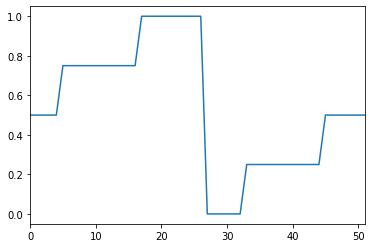

In [12]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(dfFinal) 
dfFinal['totalPorMes'] = scaled_values
dfFinal['totalPorMes'].plot();

### Separando treino e teste

In [13]:
dfteste = dfFinal[dfFinal.index == dfFinal.index[-1]]
dfTrain = dfFinal.drop(dfFinal.index[-1], axis=0)

X_test = dfteste.drop("totalPorMes", axis=1)
y_test = dfteste['totalPorMes']


X_train = dfTrain.drop("totalPorMes", axis=1)
y_train = dfTrain["totalPorMes"]

In [14]:
Vetmae = []
Vetmse = []
Vetrmse = []
modelo = []

## RadomForest

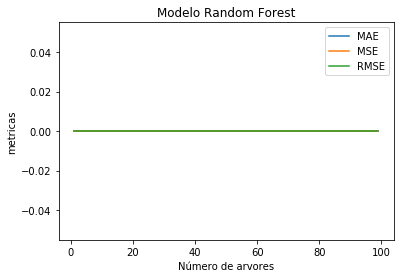

In [15]:
neighbors = np.arange(1, 100)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    rf = RandomForestRegressor(random_state=5, n_estimators=k)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo Random Forest')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de arvores')
plt.ylabel('metricas')
plt.show()

In [16]:
rf = RandomForestRegressor(random_state=5, n_estimators=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("RandomForest")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [17]:
y_test

51    0.5
Name: totalPorMes, dtype: float64

In [18]:
y_pred

array([0.5])

## KNN

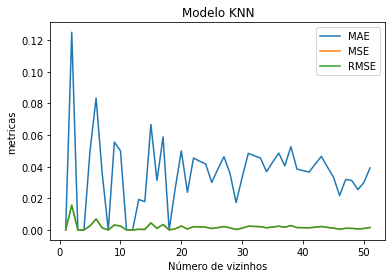

In [19]:
neighbors = np.arange(1, 52)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo KNN')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

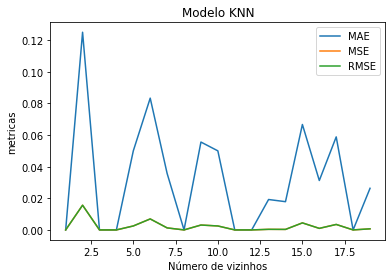

In [32]:
neighbors = np.arange(1, 20)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo KNN')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

In [35]:
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("KNN")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [22]:
y_test

51    0.5
Name: totalPorMes, dtype: float64

In [23]:
y_pred

array([0.625])

### BayesianRidge

In [24]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("Bayesian")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 4.935145625495352e-10
MSE: 2.435566234484591e-19
RMSE: 4.935145625495352e-10


In [25]:
y_test

51    0.5
Name: totalPorMes, dtype: float64

In [26]:
y_pred

array([0.5])

### LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("Linear Regression")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [28]:
y_test

51    0.5
Name: totalPorMes, dtype: float64

In [29]:
y_pred

array([0.5])

In [30]:
modelo

['RandomForest', 'KNN', 'Bayesian', 'Linear Regression']

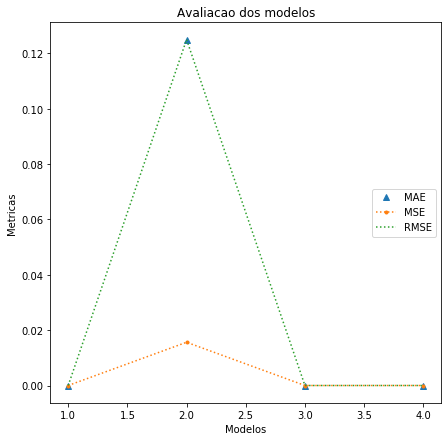

In [31]:
modelos = np.arange(1, len(modelo)+1)

plt.figure(figsize=[7,7])
plt.title('Avaliacao dos modelos')
plt.plot(modelos, Vetmae, '^', label = 'MAE')
plt.plot(modelos, Vetmse, ':.', label = 'MSE')
plt.plot(modelos, Vetrmse,':', label = 'RMSE')
plt.legend(loc='right')
plt.xlabel('Modelos')
plt.ylabel('Metricas')
plt.show()